In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [115]:
WINDOW_SIZE = 10
WINDOW_STEP_SIZE = 1
EPOCHS = 2
STEPS_PER_EPOCH = 1000

In [116]:
ROOTDIR_DATASET = './KukaVelocityDataset'
kuka_column_names_path = os.path.join(ROOTDIR_DATASET, 'KukaColumnNames.npy')
kuka_column_names = np.load(kuka_column_names_path)
kuka_column_names.reshape((1, -1))

array([['action', 'machine_nameKuka Robot_apparent_power',
        'machine_nameKuka Robot_current',
        'machine_nameKuka Robot_frequency',
        'machine_nameKuka Robot_phase_angle',
        'machine_nameKuka Robot_power',
        'machine_nameKuka Robot_power_factor',
        'machine_nameKuka Robot_reactive_power',
        'machine_nameKuka Robot_voltage', 'sensor_id1_AccX',
        'sensor_id1_AccY', 'sensor_id1_AccZ', 'sensor_id1_GyroX',
        'sensor_id1_GyroY', 'sensor_id1_GyroZ', 'sensor_id1_q1',
        'sensor_id1_q2', 'sensor_id1_q3', 'sensor_id1_q4',
        'sensor_id1_temp', 'sensor_id2_AccX', 'sensor_id2_AccY',
        'sensor_id2_AccZ', 'sensor_id2_GyroX', 'sensor_id2_GyroY',
        'sensor_id2_GyroZ', 'sensor_id2_q1', 'sensor_id2_q2',
        'sensor_id2_q3', 'sensor_id2_q4', 'sensor_id2_temp',
        'sensor_id3_AccX', 'sensor_id3_AccY', 'sensor_id3_AccZ',
        'sensor_id3_GyroX', 'sensor_id3_GyroY', 'sensor_id3_GyroZ',
        'sensor_id3_q1', 'sensor_i

In [117]:
kuka_normal_path = os.path.join(ROOTDIR_DATASET, 'KukaNormal.npy')
kuka_normal = np.load(kuka_normal_path)
kuka_normal = np.hstack((kuka_normal, np.zeros(kuka_normal.shape[0]).reshape(-1, 1) ))
kuka_normal = kuka_normal.astype('float32')
kuka_normal = (kuka_normal - np.min(kuka_normal)) / (np.max(kuka_normal) - np.min(kuka_normal))

kuka_normal = np.vstack((kuka_column_names, kuka_normal))
df_kuka_normal = pd.DataFrame(kuka_normal)
df_kuka_normal.columns = df_kuka_normal.iloc[0]
df_kuka_normal = df_kuka_normal.iloc[1:]

df_kuka_normal.drop("anomaly", axis=1, inplace=True)
df_kuka_normal = df_kuka_normal.reset_index(drop=True)
# df_kuka_normal['machine_nameKuka Robot_time'] = df_kuka_normal.index.astype(float) /  df_kuka_normal['machine_nameKuka Robot_frequency'].astype(float)

df_kuka_normal

,action,machine_nameKuka Robot_apparent_power,machine_nameKuka Robot_current,machine_nameKuka Robot_frequency,machine_nameKuka Robot_phase_angle,machine_nameKuka Robot_power,machine_nameKuka Robot_power_factor,machine_nameKuka Robot_reactive_power,machine_nameKuka Robot_voltage,sensor_id1_AccX,...,sensor_id7_AccY,sensor_id7_AccZ,sensor_id7_GyroX,sensor_id7_GyroY,sensor_id7_GyroZ,sensor_id7_q1,sensor_id7_q2,sensor_id7_q3,sensor_id7_q4,sensor_id7_temp
0,0.5000458,0.54084253,0.50029004,0.5125477,0.5802353,0.53162146,0.5002393,0.47421497,0.5571351,0.49987328,...,0.5000448,0.50029606,0.5000458,0.5000458,0.5000458,0.50002486,0.5000856,0.49982718,0.50015855,0.54511267
1,0.5000458,0.54084253,0.50029004,0.5125477,0.5802353,0.53162146,0.5002393,0.47421497,0.5571351,0.4998734,...,0.5000438,0.5002962,0.5000458,0.5000458,0.5000458,0.50002486,0.5000856,0.49982718,0.50015855,0.54511267
2,0.5000458,0.54084253,0.50029004,0.5125477,0.5802353,0.53162146,0.5002393,0.47421497,0.5571351,0.49987352,...,0.50004494,0.50029594,0.5000458,0.5000458,0.5000458,0.50002486,0.5000856,0.49982718,0.50015855,0.54511267
3,0.5000458,0.54084253,0.50029004,0.5125477,0.5802353,0.53162146,0.5002393,0.47421497,0.5571351,0.49987328,...,0.5000446,0.5002962,0.5000458,0.5000458,0.5000458,0.50002486,0.5000856,0.49982718,0.50015855,0.54511267
4,0.5000458,0.54084253,0.50029004,0.5125477,0.5802353,0.53162146,0.5002393,0.47421497,0.5571351,0.49987388,...,0.50004435,0.5002956,0.5000458,0.5000458,0.5000458,0.50002486,0.5000856,0.49982718,0.50015855,0.54511267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233787,0.5000458,0.5401675,0.5002942,0.5125477,0.5804533,0.53148186,0.5002417,0.4751176,0.55781376,0.49985716,...,0.5000452,0.50029594,0.5000458,0.5000458,0.5000458,0.5000026,0.50003374,0.5001087,0.5002836,0.54511267
233788,0.5000458,0.5401675,0.5002942,0.5125477,0.5804533,0.53148186,0.5002417,0.4751176,0.55781376,0.49985802,...,0.50004506,0.50029606,0.5000458,0.5000458,0.5000458,0.5000026,0.50003374,0.5001087,0.5002836,0.54511267
233789,0.5000458,0.5401675,0.5002942,0.5125477,0.5804533,0.53148186,0.5002417,0.4751176,0.55781376,0.49985716,...,0.50004494,0.5002957,0.5000458,0.5000458,0.5000458,0.5000026,0.50003374,0.5001087,0.5002836,0.54511267
233790,0.5000458,0.5401675,0.5002942,0.5125477,0.5804533,0.53148186,0.5002417,0.4751176,0.55781376,0.49985507,...,0.5000446,0.5002958,0.5000458,0.50006104,0.5000458,0.50000256,0.50003374,0.5001087,0.5002836,0.54511267


In [118]:
df_kuka_normal['action'].astype(float).unique()

array([0.5000458 , 0.5002958 , 0.50054586, 0.5007959 , 0.50104594,
       0.501296  , 0.501546  , 0.50179607, 0.5020461 , 0.50229615,
       0.5025462 , 0.50279623, 0.5030462 , 0.50329626, 0.5035463 ,
       0.50379634, 0.5040464 , 0.5042964 , 0.50454646, 0.5047965 ,
       0.50504655, 0.5052966 , 0.5055466 , 0.5057967 , 0.5060467 ,
       0.50629675, 0.5065468 , 0.50679684, 0.5070469 , 0.50729686,
       0.5075469 , 0.50779694])

In [119]:
kuka_slow_path = os.path.join(ROOTDIR_DATASET, 'KukaSlow.npy')
kuka_slow = np.load(kuka_slow_path)
kuka_slow = kuka_slow.astype('float32')
kuka_slow = (kuka_slow - np.min(kuka_slow)) / (np.max(kuka_slow) - np.min(kuka_slow))

kuka_slow = np.vstack((kuka_column_names, kuka_slow))

df_kuka_slow = pd.DataFrame(kuka_slow)
df_kuka_slow.columns = df_kuka_slow.iloc[0]
df_kuka_slow = df_kuka_slow.iloc[1:]
df_kuka_slow = df_kuka_slow.reset_index(drop=True)
df_kuka_slow.drop("anomaly", axis=1, inplace=True)
# df_kuka_slow['machine_nameKuka Robot_time'] = df_kuka_slow.index.astype(float) /  df_kuka_slow['machine_nameKuka Robot_frequency'].astype(float)
df_kuka_slow

,action,machine_nameKuka Robot_apparent_power,machine_nameKuka Robot_current,machine_nameKuka Robot_frequency,machine_nameKuka Robot_phase_angle,machine_nameKuka Robot_power,machine_nameKuka Robot_power_factor,machine_nameKuka Robot_reactive_power,machine_nameKuka Robot_voltage,sensor_id1_AccX,...,sensor_id7_AccY,sensor_id7_AccZ,sensor_id7_GyroX,sensor_id7_GyroY,sensor_id7_GyroZ,sensor_id7_q1,sensor_id7_q2,sensor_id7_q3,sensor_id7_q4,sensor_id7_temp
0,0.550076,0.6067533,0.5476623,0.5610488,0.6380664,0.59918267,0.5475722,0.51831156,0.6099998,0.54716,...,0.54735816,0.5476133,0.5470649,0.5448548,0.55836654,0.547275,0.5473366,0.5472404,0.54758453,0.5967761
1,0.550076,0.6067533,0.5476623,0.5610488,0.6380664,0.59918267,0.5475722,0.51831156,0.6099998,0.54716,...,0.54733306,0.54761064,0.5472826,0.54676354,0.54917455,0.5472748,0.54733574,0.54724574,0.5475864,0.5967761
2,0.550076,0.6067533,0.5476623,0.5610354,0.6380664,0.59918267,0.5475722,0.51831156,0.6099998,0.54719836,...,0.5473482,0.5476125,0.5473328,0.5472826,0.5472993,0.5472756,0.5473368,0.547246,0.5475866,0.5967761
3,0.550076,0.6067533,0.5476623,0.5610354,0.6380664,0.59918267,0.5475722,0.51831156,0.6099998,0.54716176,...,0.5473267,0.5476042,0.5473496,0.54738307,0.5472491,0.5472763,0.5473376,0.5472461,0.5475868,0.5967761
4,0.550076,0.6067533,0.5476623,0.5610354,0.6380664,0.59918267,0.5475722,0.51831156,0.6099998,0.54717046,...,0.54732543,0.5476038,0.5472993,0.5473663,0.547517,0.54727685,0.54733825,0.5472462,0.5475869,0.5967761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41533,0.5473328,0.6067829,0.5476799,0.5610354,0.6376725,0.5984644,0.54756874,0.5170063,0.61008596,0.5471686,...,0.5473347,0.54761034,0.5473328,0.5446372,0.5589023,0.5472899,0.547303,0.54744023,0.54757977,0.5967761
41534,0.5473328,0.6067829,0.5476799,0.5610354,0.6376725,0.5984644,0.54756874,0.5170063,0.61008596,0.5471686,...,0.547337,0.54760474,0.5472993,0.54467064,0.5586177,0.5472911,0.5472999,0.5474488,0.54757565,0.5967761
41535,0.5473328,0.6067829,0.5476799,0.5610354,0.6376725,0.5984644,0.54756874,0.5170063,0.61008596,0.5471686,...,0.5473308,0.5476109,0.5473328,0.5446874,0.5588521,0.54729235,0.547297,0.5474568,0.5475715,0.5967761
41536,0.5473328,0.6067829,0.5476799,0.5610354,0.6376725,0.5984644,0.54756874,0.5170063,0.61008596,0.5471686,...,0.5473386,0.54760647,0.5471989,0.5446037,0.5584503,0.54729366,0.547294,0.54746515,0.5475667,0.5967761


In [120]:
a: np.ndarray = df_kuka_slow['action'].astype(float).unique()
a.sort()
a

array([0.5473328 , 0.5476071 , 0.5478815 , 0.5481558 , 0.5484301 ,
       0.54870445, 0.54897875, 0.54925305, 0.54952735, 0.550076  ,
       0.5503503 , 0.55062467, 0.55089897, 0.55117327, 0.55144763,
       0.55172193, 0.55199623, 0.5522706 , 0.5525449 , 0.5528192 ,
       0.55309355, 0.55336785, 0.55364215, 0.5539165 , 0.5541908 ,
       0.5544651 , 0.5547394 , 0.5550138 , 0.5552881 , 0.5555624 ,
       0.55583674])

In [121]:
class Encoder(tf.keras.Model):
    def __init__(self, window_size):
        super(Encoder, self).__init__()
        # n_feature = 86
        # Input size: (n_feature, window_size)
        self.conv1d_1 = tf.keras.layers.Conv1D(filters=window_size*2, kernel_size=7, strides=1, padding='valid')
        # size: (80, window_size*2)
        self.conv1d_2 = tf.keras.layers.Conv1D(filters=window_size*4, kernel_size=4, strides=2, padding='same')
        # size: (40, window_size*4)
        self.conv1d_3 = tf.keras.layers.Conv1D(filters=window_size*8, kernel_size=4, strides=2, padding='same')
        # size: (20, window_size*8)
        self.conv1d_4 = tf.keras.layers.Conv1D(filters=window_size*16, kernel_size=4, strides=2, padding='same')
        # size: (10, window_size*16)
        self.conv1d_5 = tf.keras.layers.Conv1D(filters=window_size*32, kernel_size=10, strides=1, padding='valid')
        # size: (1, window_size*32)
        
        self.batch_norm_1 = tf.keras.layers.BatchNormalization()
        self.batch_norm_2 = tf.keras.layers.BatchNormalization()
        self.batch_norm_3 = tf.keras.layers.BatchNormalization()
        self.batch_norm_4 = tf.keras.layers.BatchNormalization()

    def build(self, input_shape):
        super(Encoder, self).build(input_shape)

    def call(self, X):
        X = self.conv1d_1(X)
        X = self.batch_norm_1(X)
        X = tf.nn.leaky_relu(X)

        X = self.conv1d_2(X)
        X = self.batch_norm_2(X)
        X = tf.nn.leaky_relu(X)

        X = self.conv1d_3(X)
        X = self.batch_norm_3(X)
        X = tf.nn.leaky_relu(X)

        X = self.conv1d_4(X)
        X = self.batch_norm_4(X)
        X = tf.nn.leaky_relu(X)
        
        X = self.conv1d_5(X)
        
        return X


class Decoder(tf.keras.Model):
    def __init__(self, window_size):
        super(Decoder, self).__init__()
        # Input size: (1, window_size*32)
        self.conv_transpose_1d_1 = tf.keras.layers.Conv1DTranspose(filters=window_size*16, kernel_size=10, strides=1, padding='valid')
        # size: (10, window_size*16)
        self.conv_transpose_1d_2 = tf.keras.layers.Conv1DTranspose(filters=window_size*8, kernel_size=4, strides=2, padding='same')
        # size: (20, window_size*8)
        self.conv_transpose_1d_3 = tf.keras.layers.Conv1DTranspose(filters=window_size*4, kernel_size=4, strides=2, padding='same')
        # size: (40, window_size*4)
        self.conv_transpose_1d_4 = tf.keras.layers.Conv1DTranspose(filters=window_size*2, kernel_size=4, strides=2, padding='same')
        # size: (80, window_size*2)
        self.conv_transpose_1d_5 = tf.keras.layers.Conv1DTranspose(filters=window_size, kernel_size=7, strides=1, padding='valid')
        # size: (86, window_size)
        
        self.batch_norm_1 = tf.keras.layers.BatchNormalization()
        self.batch_norm_2 = tf.keras.layers.BatchNormalization()
        self.batch_norm_3 = tf.keras.layers.BatchNormalization()
        self.batch_norm_4 = tf.keras.layers.BatchNormalization()

    def build(self, input_shape):
        super(Decoder, self).build(input_shape)

    def call(self, X):
        X = self.conv_transpose_1d_1(X)
        X = self.batch_norm_1(X)
        X = tf.nn.relu(X)
        
        X = self.conv_transpose_1d_2(X)
        X = self.batch_norm_2(X)
        X = tf.nn.relu(X)

        X = self.conv_transpose_1d_3(X)
        X = self.batch_norm_3(X)
        X = tf.nn.relu(X)
        
        X = self.conv_transpose_1d_4(X)
        X = self.batch_norm_4(X)
        X = tf.nn.relu(X)
        
        X = self.conv_transpose_1d_5(X)
        
        return X
    

class AutoEncoder(tf.keras.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = Encoder(WINDOW_SIZE)
        self.decoder = Decoder(WINDOW_SIZE)

    def build(self, input_shape):
        super(AutoEncoder, self).build(input_shape)

    def call(self, X):
        latent = self.encoder(X)
        X = self.decoder(latent)

        return X

In [122]:
df_kuka_normal.iloc[:1000]

,action,machine_nameKuka Robot_apparent_power,machine_nameKuka Robot_current,machine_nameKuka Robot_frequency,machine_nameKuka Robot_phase_angle,machine_nameKuka Robot_power,machine_nameKuka Robot_power_factor,machine_nameKuka Robot_reactive_power,machine_nameKuka Robot_voltage,sensor_id1_AccX,...,sensor_id7_AccY,sensor_id7_AccZ,sensor_id7_GyroX,sensor_id7_GyroY,sensor_id7_GyroZ,sensor_id7_q1,sensor_id7_q2,sensor_id7_q3,sensor_id7_q4,sensor_id7_temp
0,0.5000458,0.54084253,0.50029004,0.5125477,0.5802353,0.53162146,0.5002393,0.47421497,0.5571351,0.49987328,...,0.5000448,0.50029606,0.5000458,0.5000458,0.5000458,0.50002486,0.5000856,0.49982718,0.50015855,0.54511267
1,0.5000458,0.54084253,0.50029004,0.5125477,0.5802353,0.53162146,0.5002393,0.47421497,0.5571351,0.4998734,...,0.5000438,0.5002962,0.5000458,0.5000458,0.5000458,0.50002486,0.5000856,0.49982718,0.50015855,0.54511267
2,0.5000458,0.54084253,0.50029004,0.5125477,0.5802353,0.53162146,0.5002393,0.47421497,0.5571351,0.49987352,...,0.50004494,0.50029594,0.5000458,0.5000458,0.5000458,0.50002486,0.5000856,0.49982718,0.50015855,0.54511267
3,0.5000458,0.54084253,0.50029004,0.5125477,0.5802353,0.53162146,0.5002393,0.47421497,0.5571351,0.49987328,...,0.5000446,0.5002962,0.5000458,0.5000458,0.5000458,0.50002486,0.5000856,0.49982718,0.50015855,0.54511267
4,0.5000458,0.54084253,0.50029004,0.5125477,0.5802353,0.53162146,0.5002393,0.47421497,0.5571351,0.49987388,...,0.50004435,0.5002956,0.5000458,0.5000458,0.5000458,0.50002486,0.5000856,0.49982718,0.50015855,0.54511267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.5007959,0.54576683,0.50026786,0.51253545,0.58298796,0.5403097,0.50026596,0.47838613,0.55721474,0.49975705,...,0.5000419,0.5002874,0.50009155,0.5039221,0.48293808,0.50004256,0.5000936,0.49980995,0.5001136,0.54511267
996,0.5007959,0.54576683,0.50026786,0.51253545,0.58298796,0.5403097,0.50026596,0.47838613,0.55721474,0.4997955,...,0.5000509,0.50030863,0.5002442,0.50410527,0.48353326,0.5000475,0.50009507,0.4998067,0.50009996,0.54511267
997,0.5007959,0.54576683,0.50026786,0.51253545,0.58298796,0.5403097,0.50026596,0.47838613,0.55721474,0.49985558,...,0.50004077,0.50031537,0.50006104,0.5041205,0.483167,0.5000524,0.5000963,0.49980435,0.5000861,0.54511267
998,0.5007959,0.54576683,0.50026786,0.51253545,0.58298796,0.5403097,0.50026596,0.47838613,0.55721474,0.49973458,...,0.50005263,0.5002907,0.5000458,0.50276226,0.4892409,0.5000563,0.5000971,0.49980292,0.5000738,0.54511267


In [123]:
def sliding_window(data, window_size, step_size):
    windows = []
    for i in range(0, data.shape[0] - window_size + 1, step_size):
        windows.append(data.iloc[i:i + window_size].to_numpy().astype('float32'))
    
    x = np.array(windows).astype('float32')
    return np.swapaxes(x,1,2)

train_data = sliding_window(df_kuka_normal, WINDOW_SIZE, WINDOW_STEP_SIZE)

In [124]:
train_data.shape

(233783, 86, 10)

In [125]:
autoencoder: AutoEncoder = AutoEncoder()
autoencoder.build(train_data.shape)

train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_data)).repeat().batch(256)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

autoencoder.compile(optimizer=optimizer, loss='mse')
autoencoder.fit(train_dataset, steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS, callbacks=[callback])
autoencoder.summary()


Epoch 1/2
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.1439
Epoch 2/2
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0113


Model: "auto_encoder_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_4 (Encoder)             │ ?                      │       582,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_4 (Decoder)             │ ?                      │       582,110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,491,192 (13.32 MB)

 Trainable params: 1,163,330 (4.44 MB)

 Non-trainable params: 1,200 (4.69 KB)

 Optimizer params: 2,326,662 (8.88 MB)

In [126]:
encoded_data = autoencoder.encoder(train_data).numpy()
print(train_data.shape)
decoded_data = autoencoder.decoder(encoded_data).numpy()
print(decoded_data.shape)

(233783, 86, 10)
(233783, 86, 10)


In [127]:
train_data[0, :, 0]

array([0.5000458 , 0.54084253, 0.50029004, 0.5125477 , 0.5802353 ,
       0.53162146, 0.5002393 , 0.47421497, 0.5571351 , 0.49987328,
       0.4999928 , 0.49985972, 0.5000458 , 0.5000458 , 0.5000458 ,
       0.49981418, 0.5000542 , 0.5001344 , 0.5000766 , 0.5360813 ,
       0.50016785, 0.5000545 , 0.5002559 , 0.5000458 , 0.5000458 ,
       0.5000458 , 0.5001128 , 0.5000443 , 0.50027835, 0.5001085 ,
       0.5360813 , 0.50002956, 0.500029  , 0.499791  , 0.5000458 ,
       0.5000458 , 0.5000458 , 0.4999896 , 0.4998024 , 0.50005543,
       0.50004005, 0.5360813 , 0.5000764 , 0.4999006 , 0.5002448 ,
       0.5000458 , 0.5000458 , 0.5000458 , 0.5000091 , 0.49997592,
       0.5002282 , 0.50019747, 0.5360813 , 0.5000523 , 0.49986607,
       0.4998564 , 0.5000458 , 0.5000458 , 0.5000458 , 0.49981517,
       0.5000719 , 0.50003195, 0.5001377 , 0.5360813 , 0.50005287,
       0.50009304, 0.5003028 , 0.5000458 , 0.5000458 , 0.5000458 ,
       0.50006306, 0.5000607 , 0.5002365 , 0.5002058 , 0.54511

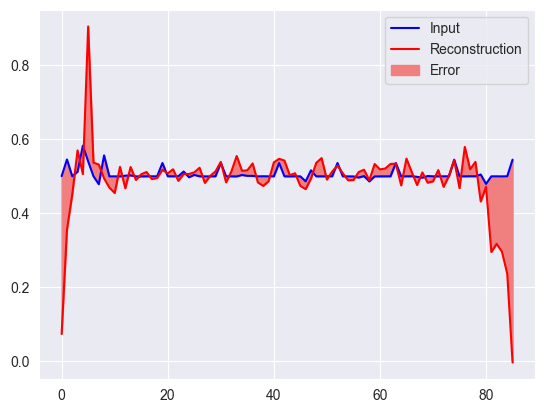

In [128]:
sample_inside_window = 4 # from 0 to 10
window_number = 38000 # from 0 to the number of windows created

# Plot the reconstruction error for each feature
plt.plot(train_data[window_number, :, sample_inside_window], 'b')
plt.plot(decoded_data[window_number, :, sample_inside_window], 'r')
plt.fill_between(np.arange(86), decoded_data[window_number, :, sample_inside_window], train_data[window_number, :, sample_inside_window], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [129]:
reconstructions = autoencoder.predict(train_data)
train_loss = tf.keras.losses.mse(reconstructions, train_data)

7306/7306 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step


In [130]:
mean_mse = np.mean(train_loss, axis=1)
mean_mse[None, :].shape

(1, 233783)

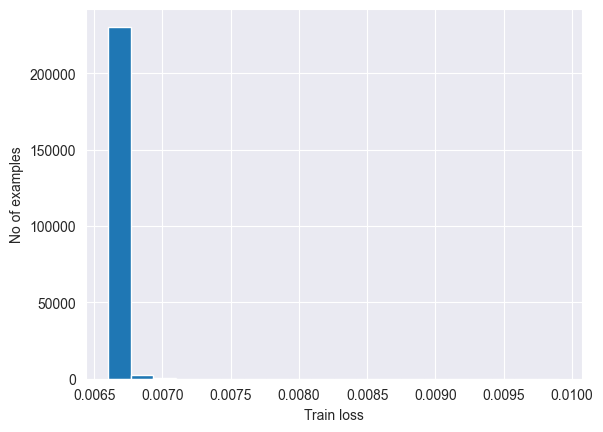

In [131]:
plt.hist(mean_mse[:, None], bins=20)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [137]:
threshold = np.mean(mean_mse) + np.std(mean_mse)
print("Threshold: ", threshold)

Threshold:  0.008


1298/1298 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step


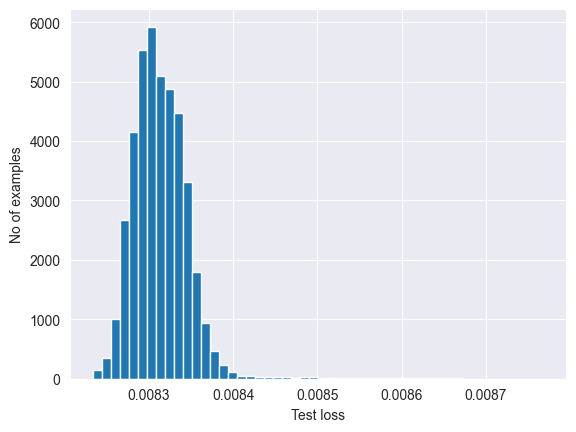

In [138]:
test_data = sliding_window(df_kuka_slow, WINDOW_SIZE, WINDOW_STEP_SIZE)

reconstructions = autoencoder.predict(test_data)
test_loss = tf.keras.losses.mse(reconstructions, test_data)

mean_mse_test = np.mean(test_loss, axis=1)

plt.hist(mean_mse_test[:, None], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [139]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mse(reconstructions, data)
  mean_mse_test = np.mean(loss, axis=1)
  return tf.math.less(mean_mse_test, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [140]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, np.zeros_like(preds))

Accuracy = 1.0
Precision = 0.0
Recall = 0.0


/Users/edoardofranco/Documents/PoliTo/Labs_and_Exercises/MLinApp/ML_application_project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/edoardofranco/Documents/PoliTo/Labs_and_Exercises/MLinApp/ML_application_project/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [141]:
print(preds.shape)
print(np.zeros_like(preds).shape)
preds

(41529,)
(41529,)


<tf.Tensor: shape=(41529,), dtype=bool, numpy=array([False, False, False, ..., False, False, False])>